In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


## 
import plotly.express as px 
import plotly.graph_objects as go 



## stat models
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm 


In [14]:
df = pd.read_csv('./data/Document.csv')

In [15]:
df.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [16]:
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


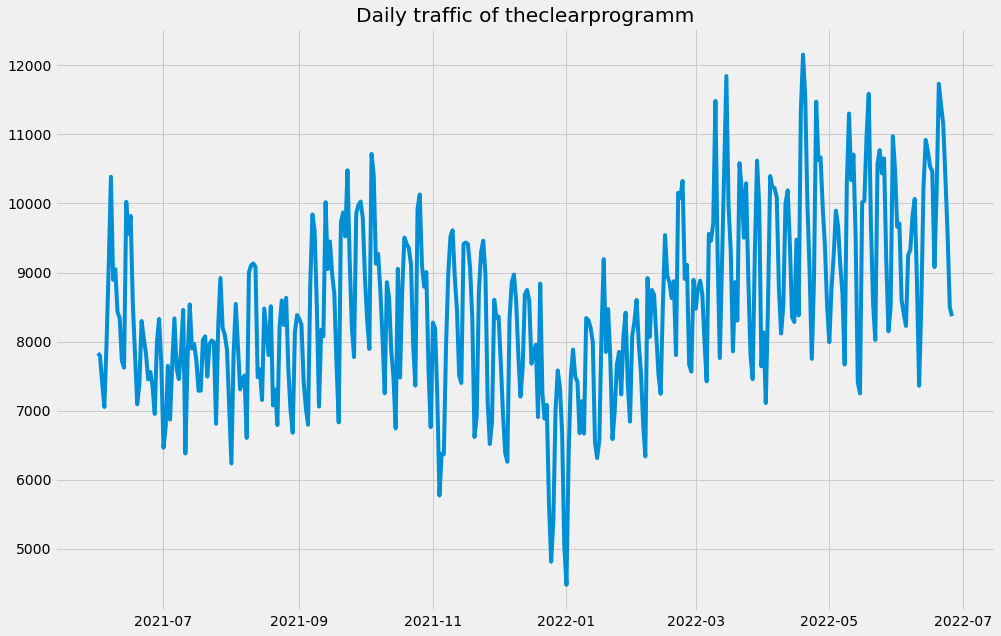

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(df['Date'],df['Views'])
plt.title('Daily traffic of theclearprogramm')
plt.show()

Our website traffic data is seasonal because the traffic onthe website increases 
during the weekdays and decreases 
during the weekends. It is valuable to know if the dataset 
is seasonal or not while working on the problem of 
Time Series Forecasting. Below is how we can have a look at 
whether our dataset is stationary or seasonal:



<ipython-input-23-165ed8ac1c32>:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



<Figure size 432x288 with 0 Axes>

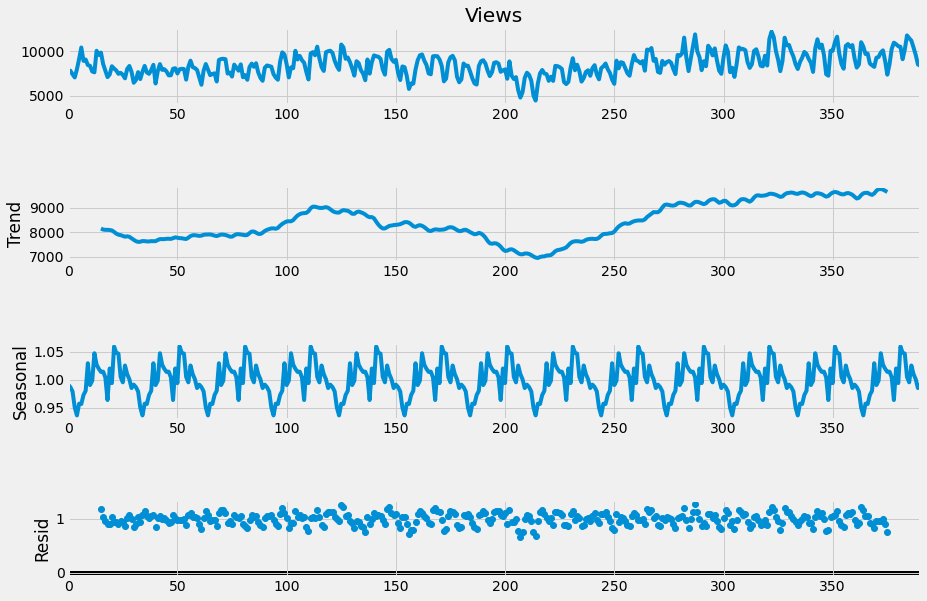

In [23]:
result = seasonal_decompose(df['Views'],model='multiplicative',freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

I will be using the Seasonal ARIMA (SARIMA) model to forecast traffic on the website. Before using the SARIMA model, it is necessary to find the p, d, and q values. You can learn how to find p, d, and q values from here.

As the data is not stationary, the value of d is 1.
 To find the values of p and q, we can use the autocorrelation and partial autocorrelation plots:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

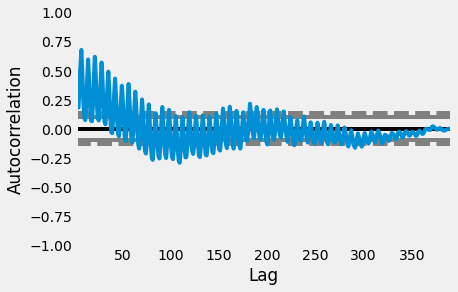

In [24]:
pd.plotting.autocorrelation_plot(df['Views'])

p=5

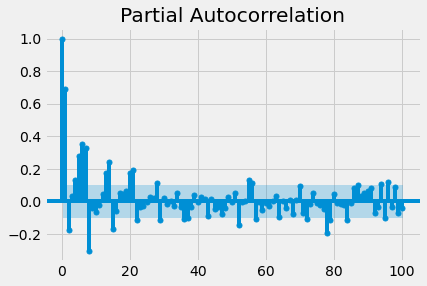

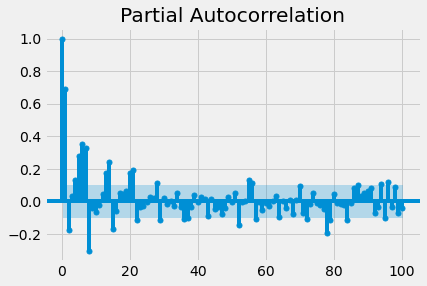

In [29]:
plot_pacf(df['Views'],lags=100)

q=2

Now here's how we can train a SARIMA model for the task of website traffic forecasting 



In [32]:
p,d,q=5,1,2

model = sm.tsa.statespace.SARIMAX(df['Views'],order=(p,d,q),seasonal_order=(p,d,q,12))

model = model.fit()
print(model.summary())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.392
Date:                            Sun, 03 Jul 2022   AIC                           6228.783
Time:                                    13:32:28   BIC                           6287.807
Sample:                                         0   HQIC                          6252.209
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7809      0.134      5.840      0.000       0.519       1.043
ar.L2         -0.7969      0.135   

In [33]:
prediction = model.predict(len(df),len(df)+50)
print(prediction)

391     9874.190397
392    10786.332796
393    10757.189830
394     9864.321056
395     8765.083965
396     8212.065122
397     8928.829164
398     9685.551521
399    10270.314183
400    10626.057608
401     9855.859673
402     9362.378262
403     9039.550467
404     9080.952746
405    10538.385177
406    11003.793570
407    10898.807201
408    10084.229028
409     9445.932643
410     8629.490584
411     9183.990744
412    10391.948270
413    10594.068937
414    10788.685623
415    10263.594920
416     9449.196554
417     9038.925136
418     9167.920428
419     9886.296720
420    10218.428366
421    10716.225607
422     9899.810800
423     9541.346017
424     9064.617465
425     8824.757593
426    10137.708399
427    10840.201864
428    10906.612590
429    10412.258813
430     9451.267995
431     8697.990482
432     8724.941565
433    10060.328126
434    10506.718760
435    10843.601023
436    10485.914230
437     9335.368245
438     9174.362446
439     9356.077105
440    10295.338941


<AxesSubplot:>

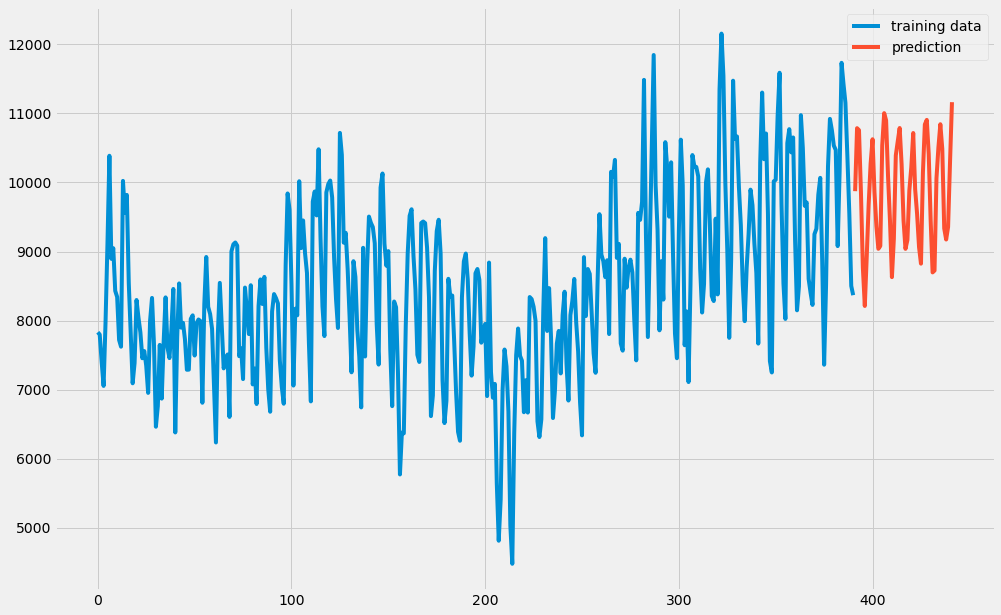

In [34]:
df['Views'].plot(legend=True,label ='training data',figsize=(15,10))
prediction.plot(legend=True,label='prediction')

### Summary
So this is how you can forecast website traffic for a particular period. Website traffic prediction is one of the best data science project ideas you can mention on your resume. I hope this article has been helpful for you to learn website traffic prediction using the Python programming language. Feel free to ask valuable questions in the comments section below.